In [2]:
%matplotlib inline

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from autorank import autorank, plot_stats, create_report, latex_table

PROJECTS = ['ant-ivy', 'archiva', 'calcite', 'cayenne', 'commons-bcel', 'commons-beanutils',
            'commons-codec', 'commons-collections', 'commons-compress', 'commons-configuration',
            'commons-dbcp', 'commons-digester', 'commons-io', 'commons-jcs', 'commons-jexl',
            'commons-lang', 'commons-math', 'commons-net', 'commons-scxml', 
            'commons-validator', 'commons-vfs', 'deltaspike', 'eagle', 'giraph', 'gora', 'jspwiki',
            'knox', 'kylin', 'lens', 'mahout', 'manifoldcf','nutch','opennlp','parquet-mr',
            'santuario-java', 'systemml', 'tika', 'wss4j']

DATA_PATH = '../data/'
FIGURES_PATH = '../figures/'

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Autorank train/test split

In [ ]:
r = pd.read_csv('{}/train_test_all.csv'.format(DATA_PATH))

In [ ]:
for lbl in ['adhoc_label', 'bug_label']: # for each label
    for cl in ['rf', 'lr']: # for each classifier
        for pm in ['f1', 'roc_auc']: # for each performance metric
            print('classifier: {}, performance metric: {}'.format(cl, pm))
            populations = pd.DataFrame()
            for ms in ['jit', 'static', 'pmd', 'jit_static_pmd']:
                populations[ms] = r[(r['label'] == lbl) & (r['metric_set'] == ms)]['{}_{}'.format(cl, pm)].values
            print(lbl)
            result = autorank(populations, alpha=0.05, verbose=False)
            plot_stats(result)
            latex_table(result)
            plt.show()

# Autorank interval

In [ ]:
scores = []
for project_name in PROJECTS:
    fname = '{}/interval_mean_{}.csv'.format(DATA_PATH, project_name)
    if os.path.exists(fname):
        scores.append(pd.read_csv(fname))

r = pd.concat(scores)

In [ ]:
for lbl in ['label_adhoc', 'label_bug']:
    for cl in ['rf', 'lr']:
        for pm in ['f1', 'roc_auc']:
            print('classifier: {}, performance metric: {}'.format(cl, pm))
            populations = pd.DataFrame()
            for ms in ['jit', 'static', 'pmd', 'jit_static_pmd']:
                populations[ms] = r[(r['label'] == lbl) & (r['metric_set'] == ms)]['{}_{}'.format(cl, pm)].values
            print(lbl)
            result = autorank(populations, alpha=0.05, verbose=False)
            plot_stats(result)
            latex_table(result)
            plt.show()

# Autorank train/test merge classifiers

performance metric: f1
\begin{table}[h]
\centering
\begin{tabular}{llllll}
\toprule
{} &     M &    SD &              CI &   \$d\$ &   Magnitude \\
\midrule
combined & 0.493 & 0.158 &  [0.463, 0.524] & 0.000 &  negligible \\
jit      & 0.483 & 0.160 &  [0.452, 0.513] & 0.069 &  negligible \\
pmd      & 0.414 & 0.142 &  [0.383, 0.445] & 0.528 &      medium \\
static   & 0.405 & 0.123 &  [0.375, 0.436] & 0.622 &      medium \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


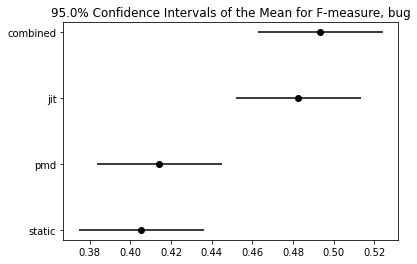

performance metric: roc_auc
\begin{table}[h]
\centering
\begin{tabular}{llllll}
\toprule
{} &     M &    SD &              CI &   \$d\$ &   Magnitude \\
\midrule
combined & 0.854 & 0.062 &  [0.840, 0.868] & 0.000 &  negligible \\
jit      & 0.845 & 0.061 &  [0.831, 0.859] & 0.147 &  negligible \\
pmd      & 0.768 & 0.078 &  [0.754, 0.782] & 1.229 &       large \\
static   & 0.770 & 0.067 &  [0.755, 0.784] & 1.306 &       large \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


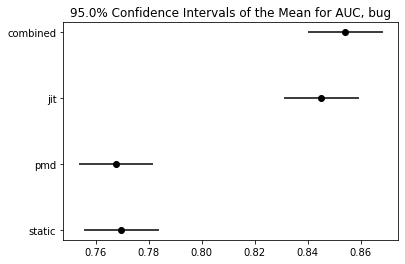

performance metric: ub
\begin{table}[h]
\centering
\begin{tabular}{lrlllll}
\toprule
{} &    MR &      MED &     MAD &                   CI & $\delta$ &   Magnitude \\
\midrule
combined & 1.697 & 1064.415 & 636.091 &  [815.662, 1573.794] &         0 &  negligible \\
jit      & 2.211 & 1012.856 & 641.797 &  [804.429, 1485.196] &     0.032 &  negligible \\
static   & 2.974 &  904.125 & 509.747 &  [679.190, 1227.038] &     0.210 &       small \\
pmd      & 3.118 &  883.735 & 484.043 &  [611.905, 1149.830] &     0.246 &       small \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


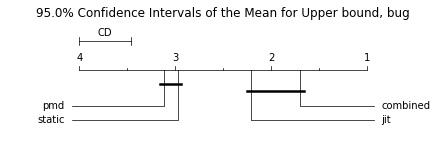

performance metric: lb
\begin{table}[h]
\centering
\begin{tabular}{lrlllll}
\toprule
{} &    MR &     MED &     MAD &                  CI & $\delta$ &   Magnitude \\
\midrule
static   & 2.184 & 615.767 & 327.633 &  [483.596, 857.914] &     0.000 &  negligible \\
pmd      & 2.289 & 593.713 & 263.912 &  [506.714, 792.513] &    -0.007 &  negligible \\
jit      & 2.500 & 568.474 & 289.525 &  [469.000, 784.205] &     0.068 &  negligible \\
combined & 3.026 & 523.870 & 251.167 &  [453.910, 750.214] &     0.127 &  negligible \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


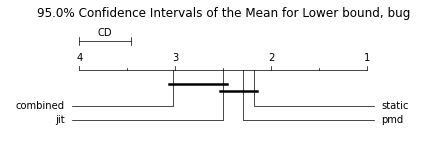

performance metric: f1
\begin{table}[h]
\centering
\begin{tabular}{lrlllll}
\toprule
{} &    MR &   MED &   MAD &              CI & $\delta$ &   Magnitude \\
\midrule
combined & 1.579 & 0.176 & 0.110 &  [0.121, 0.241] &    -0.000 &  negligible \\
static   & 2.414 & 0.157 & 0.114 &  [0.105, 0.227] &     0.119 &  negligible \\
jit      & 2.678 & 0.155 & 0.104 &  [0.101, 0.222] &     0.143 &  negligible \\
pmd      & 3.329 & 0.129 & 0.089 &  [0.084, 0.188] &     0.264 &       small \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


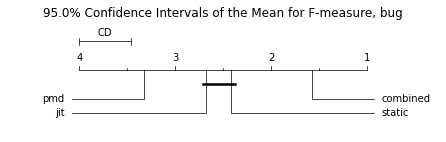

performance metric: roc_auc
\begin{table}[h]
\centering
\begin{tabular}{lrlllll}
\toprule
{} &    MR &   MED &   MAD &              CI & $\delta$ &   Magnitude \\
\midrule
combined & 1.224 & 0.878 & 0.043 &  [0.860, 0.907] &         0 &  negligible \\
static   & 2.724 & 0.827 & 0.056 &  [0.801, 0.864] &     0.508 &       large \\
jit      & 2.868 & 0.831 & 0.046 &  [0.807, 0.857] &     0.597 &       large \\
pmd      & 3.184 & 0.808 & 0.051 &  [0.782, 0.837] &     0.656 &       large \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


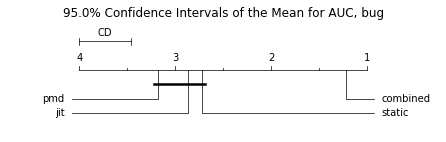

performance metric: ub
\begin{table}[h]
\centering
\begin{tabular}{lrlllll}
\toprule
{} &    MR &   M &   SD &          CI &  \$d\$ & Magnitude \\
\midrule
combined & 2.178 & inf &  NaN &  [nan, nan] &  NaN &     large \\
static   & 2.257 & inf &  NaN &  [nan, nan] &  NaN &     large \\
pmd      & 2.625 & inf &  NaN &  [nan, nan] &  NaN &     large \\
jit      & 2.941 & inf &  NaN &  [nan, nan] &  NaN &     large \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


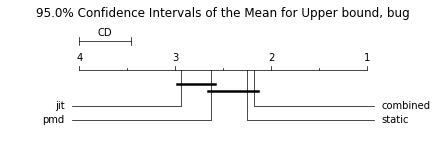

performance metric: lb
\begin{table}[h]
\centering
\begin{tabular}{lrlllll}
\toprule
{} &    MR &   M &   SD &          CI &  \$d\$ & Magnitude \\
\midrule
jit      & 1.862 & inf &  NaN &  [nan, nan] &  NaN &     large \\
pmd      & 2.618 & inf &  NaN &  [nan, nan] &  NaN &     large \\
combined & 2.678 & inf &  NaN &  [nan, nan] &  NaN &     large \\
static   & 2.842 & inf &  NaN &  [nan, nan] &  NaN &     large \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


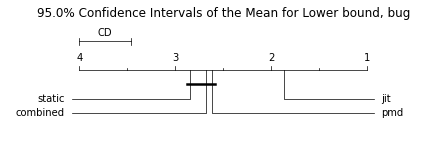

In [39]:
r = pd.read_csv('{}/train_test_all.csv'.format(DATA_PATH))
for lbl in ['adhoc_label', 'bug_label']: # for each label
    for pm in ['f1', 'roc_auc', 'ub', 'lb']: # for each performance metric
        print('performance metric: {}'.format(pm))
        populations = pd.DataFrame()
        for ms in ['jit', 'static', 'pmd', 'jit_static_pmd']:
            name = ms
            if name == 'jit_static_pmd':
                name = 'combined'

            populations[name] = np.concatenate((r[(r['label'] == lbl) & (r['metric_set'] == ms)]['rf_{}'.format(pm)].values, r[(r['label'] == lbl) & (r['metric_set'] == ms)]['lr_{}'.format(pm)].values))

        result = autorank(populations, alpha=0.05, verbose=False)
        plot_stats(result)
        latex_table(result)

        if lbl == 'label_adhoc':
            lbl_name = 'ad-hoc'
        if lbl == 'label_bug':
            lbl_name = 'bug'
        if pm == 'f1':
            pm_name = 'F-measure'
        if pm == 'roc_auc':
            pm_name = 'AUC'
        if pm == 'ub':
            pm_name = 'Upper bound'
        if pm == 'lb':
            pm_name = 'Lower bound'
        
        plt.title('95.0% Confidence Intervals of the Mean for {}, {}'.format(pm_name, lbl_name))
        #plt.tight_layout()
        #plt.savefig(FIGURES_PATH + '/ar_tt_{}_{}.pdf'.format(lbl, pm))
        plt.show()

# Autorank interval merge classifiers

performance metric: f1
\begin{table}[h]
\centering
\begin{tabular}{lrlllll}
\toprule
{} &    MR &   MED &   MAD &              CI & $\delta$ &   Magnitude \\
\midrule
combined & 2.160 & 0.350 & 0.229 &  [0.317, 0.386] &     0.000 &  negligible \\
static   & 2.400 & 0.333 & 0.225 &  [0.300, 0.370] &     0.018 &  negligible \\
jit      & 2.469 & 0.320 & 0.251 &  [0.286, 0.361] &     0.061 &  negligible \\
pmd      & 2.971 & 0.271 & 0.228 &  [0.238, 0.308] &     0.161 &       small \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


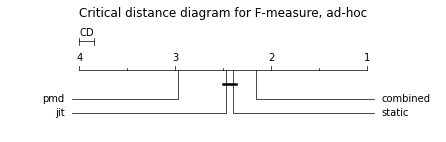

performance metric: roc_auc
\begin{table}[h]
\centering
\begin{tabular}{lrlllll}
\toprule
{} &    MR &   MED &   MAD &              CI & $\delta$ &   Magnitude \\
\midrule
combined & 2.030 & 0.707 & 0.120 &  [0.690, 0.726] &     0.000 &  negligible \\
jit      & 2.381 & 0.695 & 0.136 &  [0.674, 0.711] &     0.079 &  negligible \\
static   & 2.470 & 0.682 & 0.126 &  [0.663, 0.700] &     0.110 &  negligible \\
pmd      & 3.119 & 0.624 & 0.121 &  [0.604, 0.640] &     0.352 &      medium \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


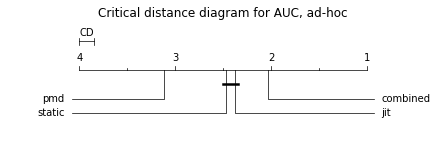

performance metric: ub
\begin{table}[h]
\centering
\begin{tabular}{lrlllll}
\toprule
{} &    MR &   M &   SD &          CI &  \$d\$ & Magnitude \\
\midrule
static   & 2.362 & inf &  NaN &  [nan, nan] &  NaN &     large \\
combined & 2.385 & inf &  NaN &  [nan, nan] &  NaN &     large \\
pmd      & 2.425 & inf &  NaN &  [nan, nan] &  NaN &     large \\
jit      & 2.828 & inf &  NaN &  [nan, nan] &  NaN &     large \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


/srv/www/icsme2020_replication/lib/python3.8/site-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/srv/www/icsme2020_replication/lib/python3.8/site-packages/autorank/_util.py:57: RuntimeWarning: invalid value encountered in double_scalars
  return (np.mean(x) - np.mean(y)) / np.sqrt(


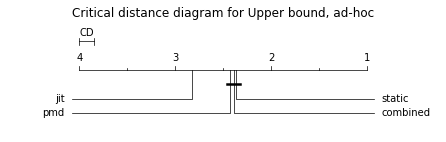

performance metric: lb
\begin{table}[h]
\centering
\begin{tabular}{lrlllll}
\toprule
{} &    MR &   M &   SD &          CI &  \$d\$ & Magnitude \\
\midrule
jit      & 2.217 & inf &  NaN &  [nan, nan] &  NaN &     large \\
pmd      & 2.458 & inf &  NaN &  [nan, nan] &  NaN &     large \\
combined & 2.558 & inf &  NaN &  [nan, nan] &  NaN &     large \\
static   & 2.617 & inf &  NaN &  [nan, nan] &  NaN &     large \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


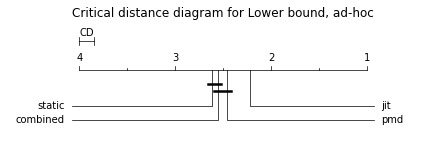

performance metric: f1
\begin{table}[h]
\centering
\begin{tabular}{lrlllll}
\toprule
{} &    MR &   MED &   MAD &              CI & $\delta$ &   Magnitude \\
\midrule
combined & 2.226 & 0.085 & 0.126 &  [0.057, 0.118] &     0.000 &  negligible \\
static   & 2.437 & 0.091 & 0.135 &  [0.063, 0.118] &    -0.012 &  negligible \\
pmd      & 2.663 & 0.062 & 0.091 &  [0.040, 0.091] &     0.053 &  negligible \\
jit      & 2.674 & 0.054 & 0.080 &  [0.026, 0.078] &     0.114 &  negligible \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


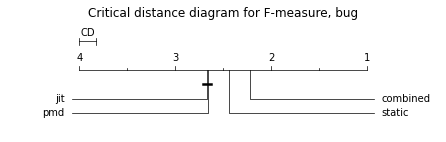

performance metric: roc_auc
\begin{table}[h]
\centering
\begin{tabular}{lrlllll}
\toprule
{} &    MR &   MED &   MAD &              CI & $\delta$ &   Magnitude \\
\midrule
combined & 2.012 & 0.759 & 0.171 &  [0.739, 0.784] &         0 &  negligible \\
static   & 2.446 & 0.732 & 0.163 &  [0.708, 0.767] &     0.091 &  negligible \\
pmd      & 2.714 & 0.696 & 0.187 &  [0.667, 0.719] &     0.205 &       small \\
jit      & 2.828 & 0.672 & 0.199 &  [0.641, 0.705] &     0.249 &       small \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


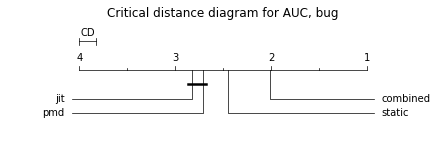

performance metric: ub
\begin{table}[h]
\centering
\begin{tabular}{lrlllll}
\toprule
{} &    MR &   M &   SD &          CI &  \$d\$ & Magnitude \\
\midrule
combined & 2.301 & inf &  NaN &  [nan, nan] &  NaN &     large \\
static   & 2.411 & inf &  NaN &  [nan, nan] &  NaN &     large \\
pmd      & 2.478 & inf &  NaN &  [nan, nan] &  NaN &     large \\
jit      & 2.810 & inf &  NaN &  [nan, nan] &  NaN &     large \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


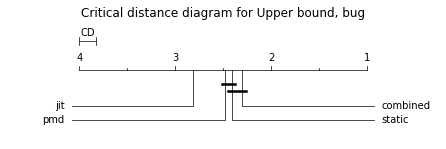

performance metric: lb
\begin{table}[h]
\centering
\begin{tabular}{lrlllll}
\toprule
{} &    MR &   M &   SD &          CI &  \$d\$ & Magnitude \\
\midrule
jit      & 2.038 & inf &  NaN &  [nan, nan] &  NaN &     large \\
pmd      & 2.474 & inf &  NaN &  [nan, nan] &  NaN &     large \\
static   & 2.481 & inf &  NaN &  [nan, nan] &  NaN &     large \\
combined & 2.490 & inf &  NaN &  [nan, nan] &  NaN &     large \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}


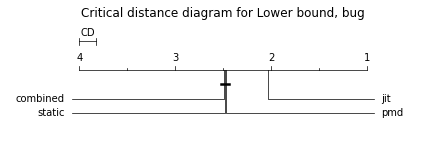

In [38]:
# load interval data data
scores = []
for project_name in PROJECTS:
    fname = '{}/interval_mean_{}.csv'.format(DATA_PATH, project_name)
    if os.path.exists(fname):
        scores.append(pd.read_csv(fname))

r = pd.concat(scores)

for lbl in ['label_adhoc', 'label_bug']: # for each label
    for pm in ['f1', 'roc_auc', 'ub', 'lb']: # for each performance metric
        print('performance metric: {}'.format(pm))
        populations = pd.DataFrame()
        for ms in ['jit', 'static', 'pmd', 'jit_static_pmd']:
            name = ms
            if name == 'jit_static_pmd':
                name = 'combined'

            populations[name] = np.concatenate((r[(r['label'] == lbl) & (r['metric_set'] == ms)]['rf_{}'.format(pm)].values, r[(r['label'] == lbl) & (r['metric_set'] == ms)]['lr_{}'.format(pm)].values))

        result = autorank(populations, alpha=0.05, verbose=False)
        plot_stats(result)
        latex_table(result)

        if lbl == 'label_adhoc':
            lbl_name = 'ad-hoc'
        if lbl == 'label_bug':
            lbl_name = 'bug'
        if pm == 'f1':
            pm_name = 'F-measure'
        if pm == 'roc_auc':
            pm_name = 'AUC'
        if pm == 'ub':
            pm_name = 'Upper bound'
        if pm == 'lb':
            pm_name = 'Lower bound'
        plt.title('Critical distance diagram for {}, {}'.format(pm_name, lbl_name))
        #plt.savefig(FIGURES_PATH + '/ar_interval_{}_{}.pdf'.format(lbl, pm))
        plt.show()